In [1]:
from moldy.case_studies.grub_sim.nempc_grub_sim import nempc_grub_setup
from moldy.case_studies.grub_sim.model_grub_sim import GrubSim
from moldy.validation.control.control_test import ControlTest

grub_params = {
    "mass": 5.3946339367881455,
    "stiffness": 12.657823577745912,
    "damping": 3.714360045199257,
    "pressure_resp_coeff": 3.386059758250698,
    "h": 0.1667074298414083,
    "r": 0.0688555835455514,
}

tester = ControlTest(ground_truth=GrubSim(**grub_params), 
                    nempc_setup=nempc_grub_setup,
                    horizon=50,
                    sim_seconds=2.0,
                    states_of_interest=[6, 7],
                    )

GrubSim: mass: 5.3946339367881455, stiffness: 12.657823577745912, damping: 3.714360045199257, alpha: 3.386059758250698, h: 0.23, r: 0.0688555835455514


In [2]:
tester.run_trials("/home/daniel/catkin_ws/src/moldy/case_studies/grub_sim/results/test_results/",
                "/home/daniel/Documents/data/xfer_learning/grub_sim/models/",
                run_analytical=False,
                numSims=500,
                numParents=200,
                numStrangers=30)

In [3]:
from moldy.validation.utils import calculate_trial_iae
sorted_iaes = calculate_trial_iae(tester.results, [6, 7])

Sorted IAEs
Trial base_100K_100E_04_changed_params: 18.11029901185774
Trial xfer_100K_100E_04_changed_params: 18.79525794033974
Trial base_200K_250E_default_params: 19.058106061275968
Trial base_200K_250E_04_changed_params: 19.66241567255564
Trial xfer_100K_100E_04_changed_params_high_lr: 21.55664212509972
Trial xfer_30K_250E_04_changed_params_high_lr: 22.100650916105213
Trial xfer_100K_250E_04_changed_params_high_lr: 22.29543956042653
Trial xfer_30K_100E_04_changed_params_high_lr: 22.73507679404639
Trial xfer_30K_100E_04_changed_params: 27.36504929556031


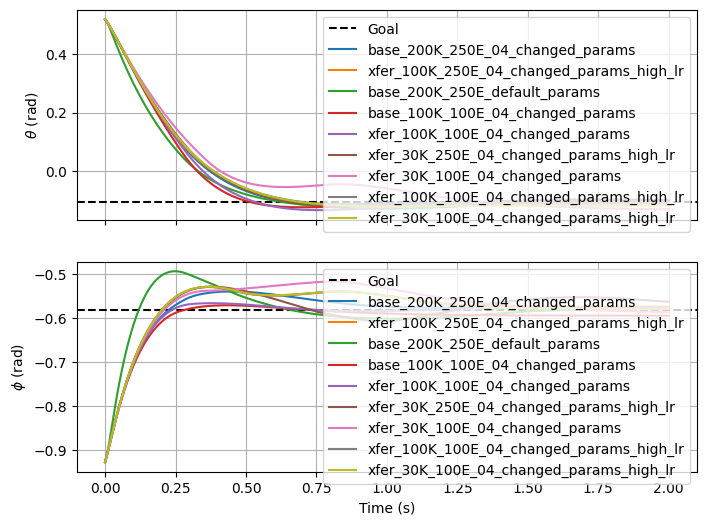

In [4]:
from moldy.figure_generation.fig_utils import plot_control_performance
plot_control_performance(tester.results, tester.xgoal, [6, 7], ["$\\theta$ (rad)", "$\\phi$ (rad)"],
                                                     "/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/xfer_grub_sim_plot.png")